# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
from IPython.display import Image
from datetime import datetime

# runtime
import timeit

# Data Manipulation
import numpy as np
import pandas as pd

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline



In [2]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [3]:
display(df.head(3))
print(df.info())
print(df.describe())
print(df.shape)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



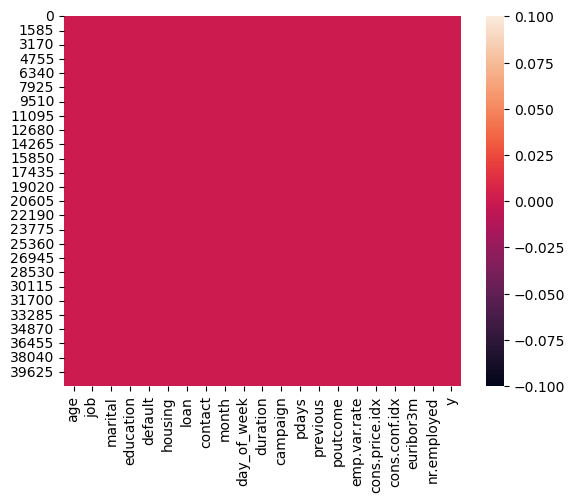

In [4]:
# Check for null values
sns.heatmap(df.isnull())
plt.show()

No null values in the dataset.

In [5]:
# Drop duplicate records if any
df = df.drop_duplicates()

In [6]:
df.shape

(41176, 21)

In [7]:
# Change the datatypes
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month
df['month'].value_counts().index

Int64Index([5, 7, 8, 6, 11, 4, 10, 9, 3, 12], dtype='int64')

In [8]:
print(df['day_of_week'].value_counts().index)

Index(['thu', 'mon', 'wed', 'tue', 'fri'], dtype='object')


In [9]:
d = {'thu':4, 'mon':1, 'wed':3, 'tue':2, 'fri':5}
df['day_of_week'] = df['day_of_week'].map(d)
df['day_of_week'].value_counts().index

Int64Index([4, 1, 3, 2, 5], dtype='int64')

Change this feature for column pdays to a categorical one, if the value is 999, then it will be replaced with a 'no' which means that the client was not previously contacted, else, it will have a 'yes'

In [10]:
# Convert all 999 value to 'no'. All other values will be 'yes'
def pcontacted(x):
    if x == 999:
        return 'no'
    else:
        return 'yes'

df['pdays'] = df['pdays'].apply(pcontacted)
df.rename(columns={"pdays": "bcontacted"}, inplace=True)
df['bcontacted'].value_counts()

no     39661
yes     1515
Name: bcontacted, dtype: int64

In [11]:
# Drops NA
def drop(column):

    df[column].replace('unknown', np.nan, inplace=True)
    df.dropna(inplace=True)

drop('job')
drop('marital')
drop('education')
drop('housing')
drop('default')

In [12]:
# Convert all 999 value to 'no'. All other values will be 'yes'
def y_value(x):
    if x == 'no':
        return '0'
    else:
        return '1'

df['y'] = df['y'].apply(y_value)
#df.rename(columns={"pdays": "bcontacted"}, inplace=True)
df['y'] = df['y'].astype(int)

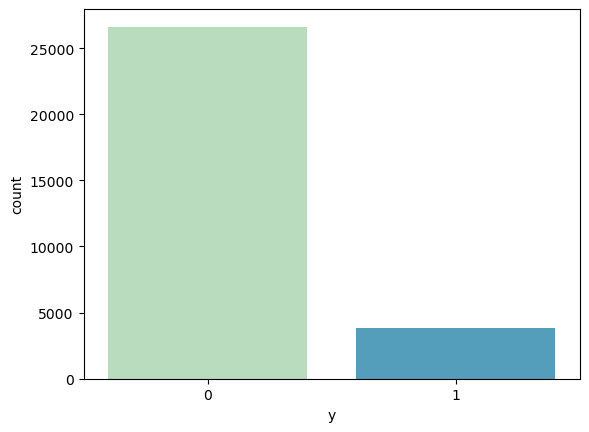

In [13]:
sns.countplot(data=df, x='y',palette='GnBu')
plt.show()

In [14]:
# Exploration of Categorical Features
cat = df.select_dtypes('object').columns.to_list()
cat = cat[:-1]
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'bcontacted']

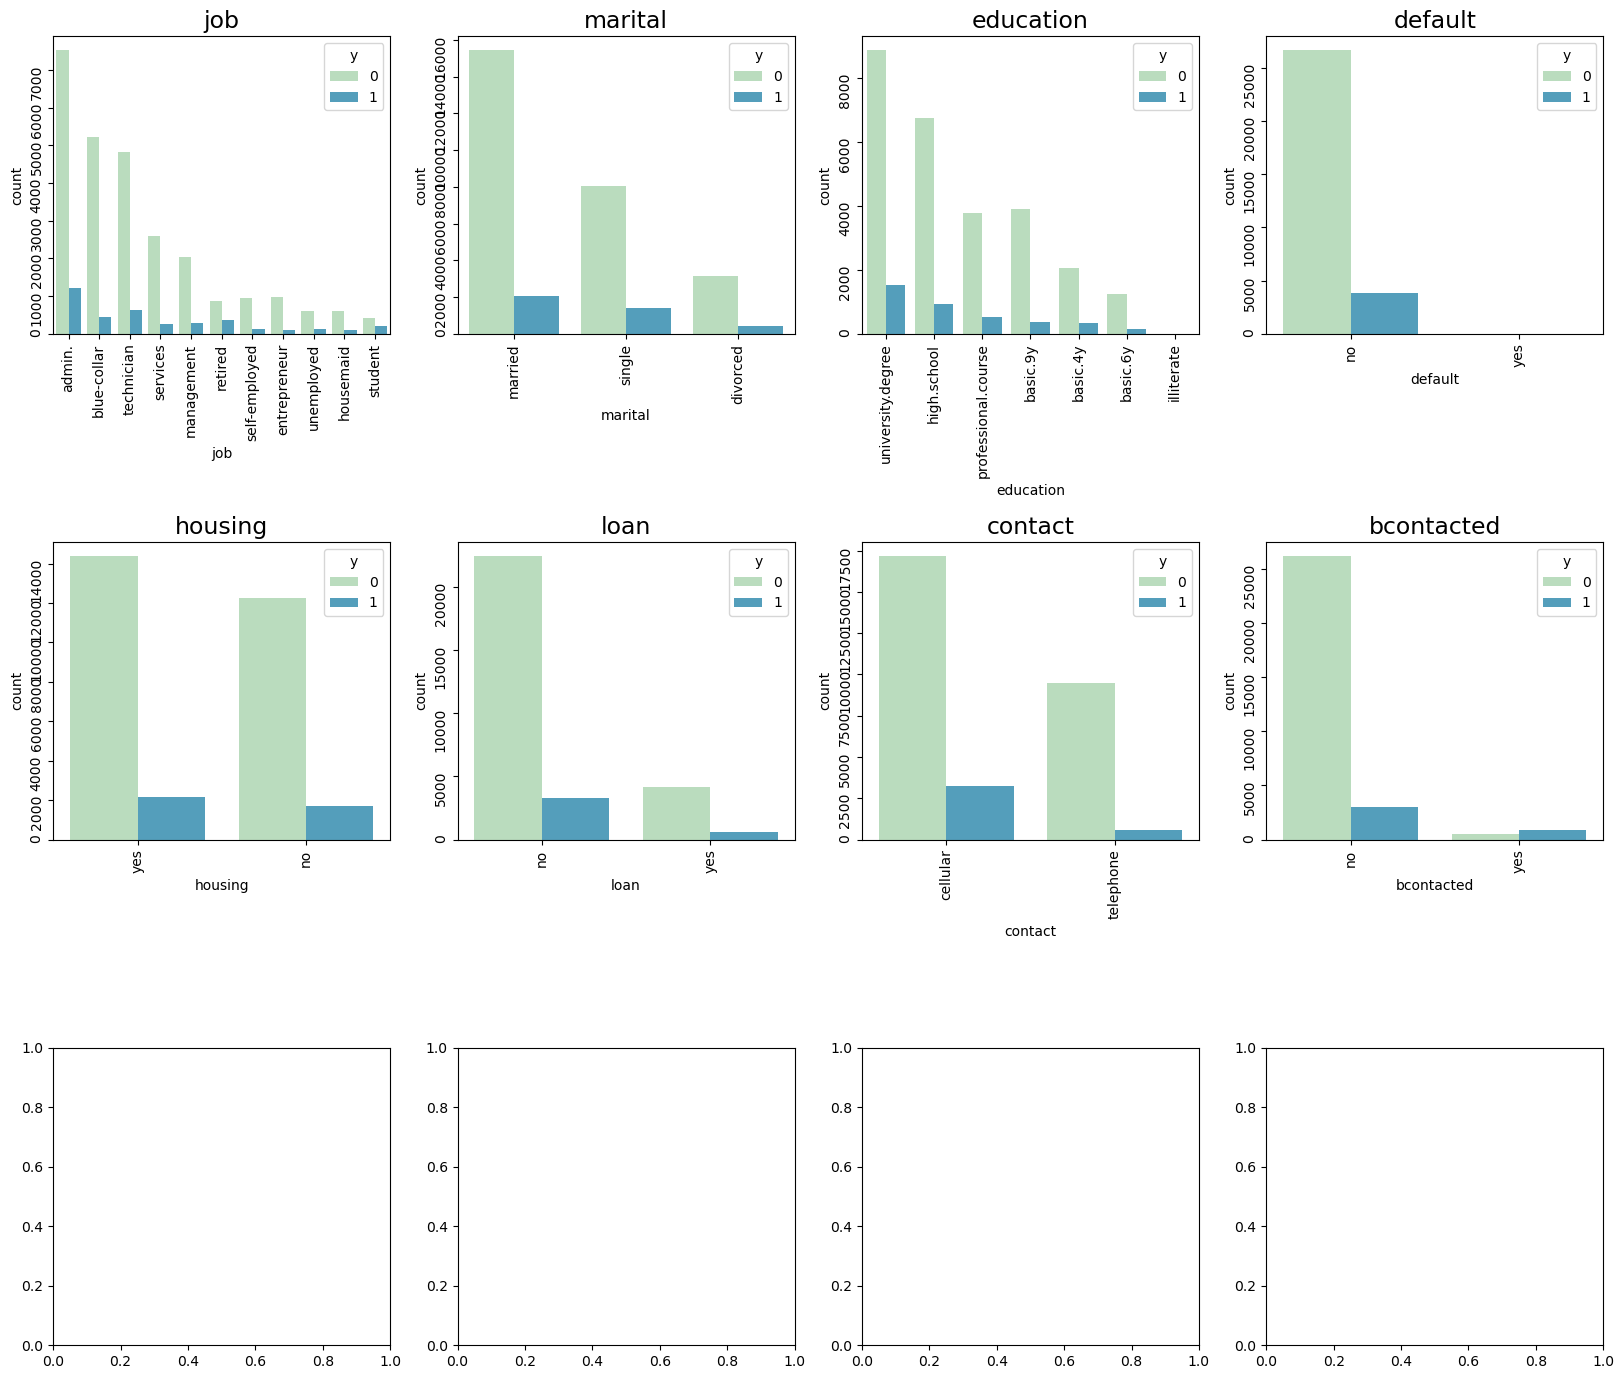

In [15]:
# To plot all categorical features in a single plot
fig, ax = plt.subplots(3,4, figsize=(20,17))

cat = df.select_dtypes('object').columns.to_list()
cat = cat[:-1]

ax = ax.ravel()
position = 0

for i in cat:
    
    order = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

# Imbalanced data problem:
The target feature 'y' is dominated by 'no's. Will have to apply an oversampling method to avoid the model predicting based on size. 
All of the features follow the same trend, there is a group that is mostly targeted and then it descends. The proportion of 'yes' and 'no', follow the same pattern as it descends, (around 10% of the sample)
The value, where 'yes' overcome 'no' is located in the feature 'poutcoume', where if there is a success in previous outcomes, the client will say 'yes' to the marketing campaign. The sample, though is extremely low.
'yes' in 'bcontacted' is also bigger in this feature, but the sample is also quite small
de bias in analysis.

In [16]:
# Numerical Columns
df['month'] = df['month'].astype('str')
df['day_of_week'] = df['day_of_week'].astype('str')

numbers = df.select_dtypes(['int64', 'float64']).columns.to_list()
len(numbers)

10

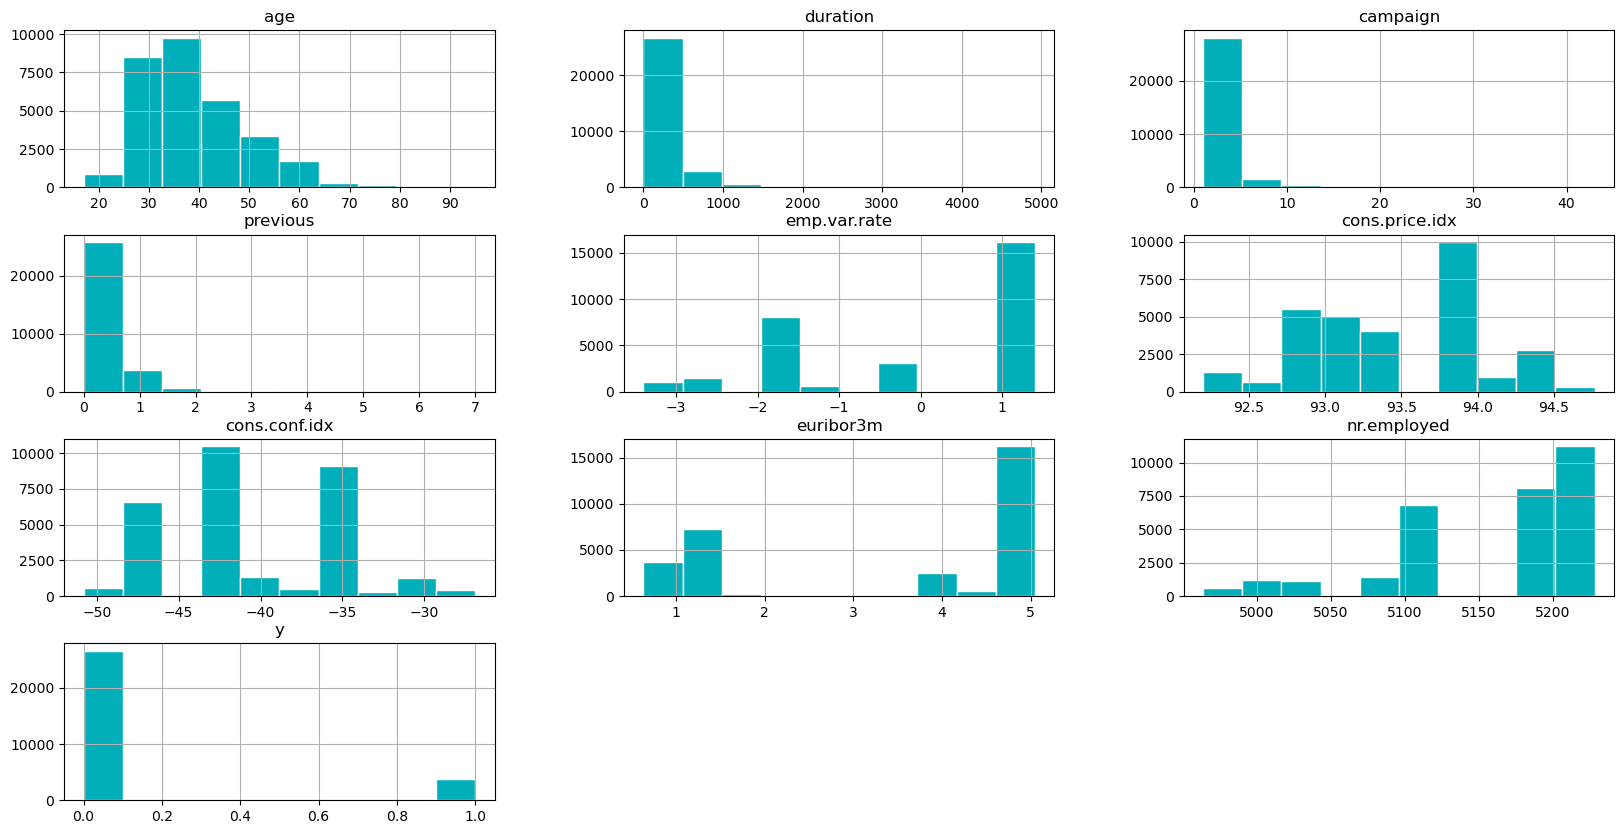

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000
mean,39.029694,259.513124,2.521721,0.194337,-0.071425,93.523376,-40.602579,3.459976,5160.813967,0.126583
std,10.332746,261.746393,2.720495,0.522862,1.610306,0.585366,4.788790,1.777215,75.158267,0.332511
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,31.000000,103.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000,0.000000
50%,37.000000,181.000000,2.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,0.000000
75%,45.000000,321.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,95.000000,4918.000000,43.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [17]:
# Distribution 
df.hist(figsize=(20,10), edgecolor='white', color='#00afb9')
plt.show()
display(df[numbers].describe())

age - The targeted age tend to be between 32 and 47 which is the most productive age. It also has the most 'normal' distribution, this will be key for our machine learning algorithm

duratono . Duration's mean (258.20) drastically differs from the median (180). This is because some high duration calls (outliers) that push the distribution to the rig

t
campgnai . clients tend to be contacted two times (median = 2) during the campi

gn
prou  - s. most of the values are 0. Similarly to the 'pdays' attribute, this means that most of the clients haven't becontactedted f.
.
ore
emp.var.rate values tend to be between -1.8 and

 1.4
cons.pric - .idx. and cons.conf.idx don't var too

 muc
eur  - or3m. The clients were contacted usually when the Eumribor3 rate was between d 4.96
 below

In [18]:
# Duration column needs to be dropped 
df.drop(['duration'], axis=1, inplace=True)
numbers = df.select_dtypes(['int64', 'float64']).columns.to_list()

Correlation

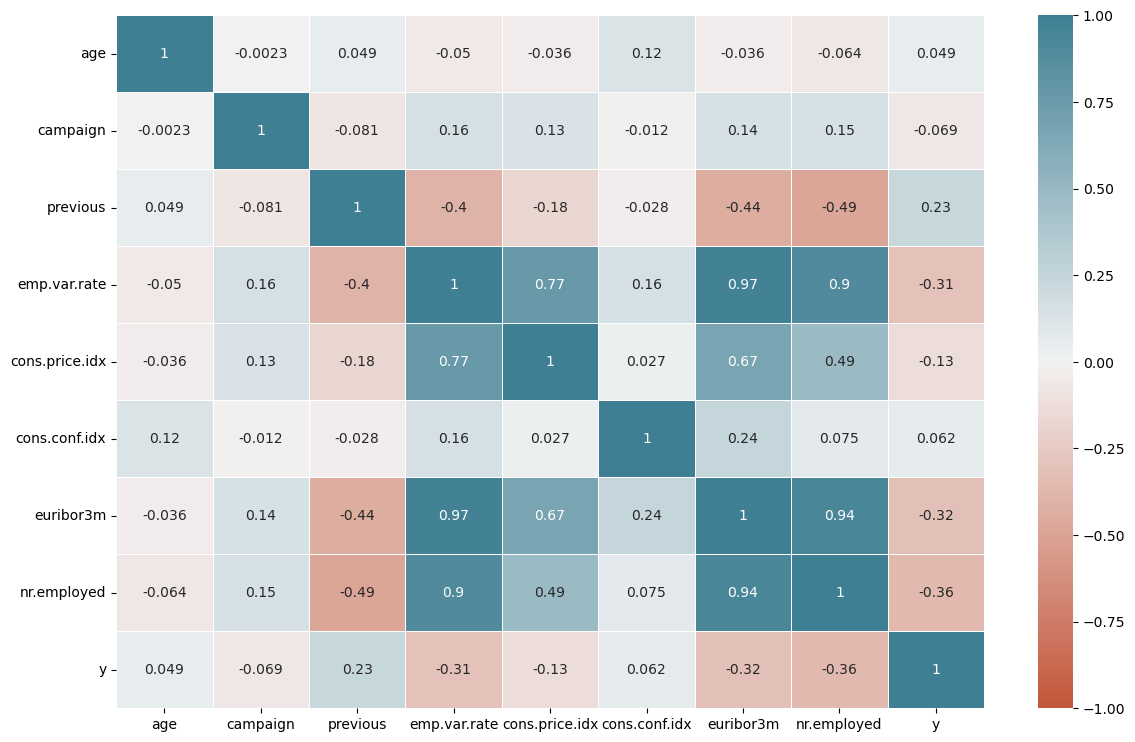

In [19]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df[numbers].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

# age and campaign don't show any high correlation. 
# duration column will be dropped as it have 0 values.

In [20]:
numbers

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [21]:
df['month'] = df['month'].astype('int')
df['day_of_week'] = df['day_of_week'].astype('int')


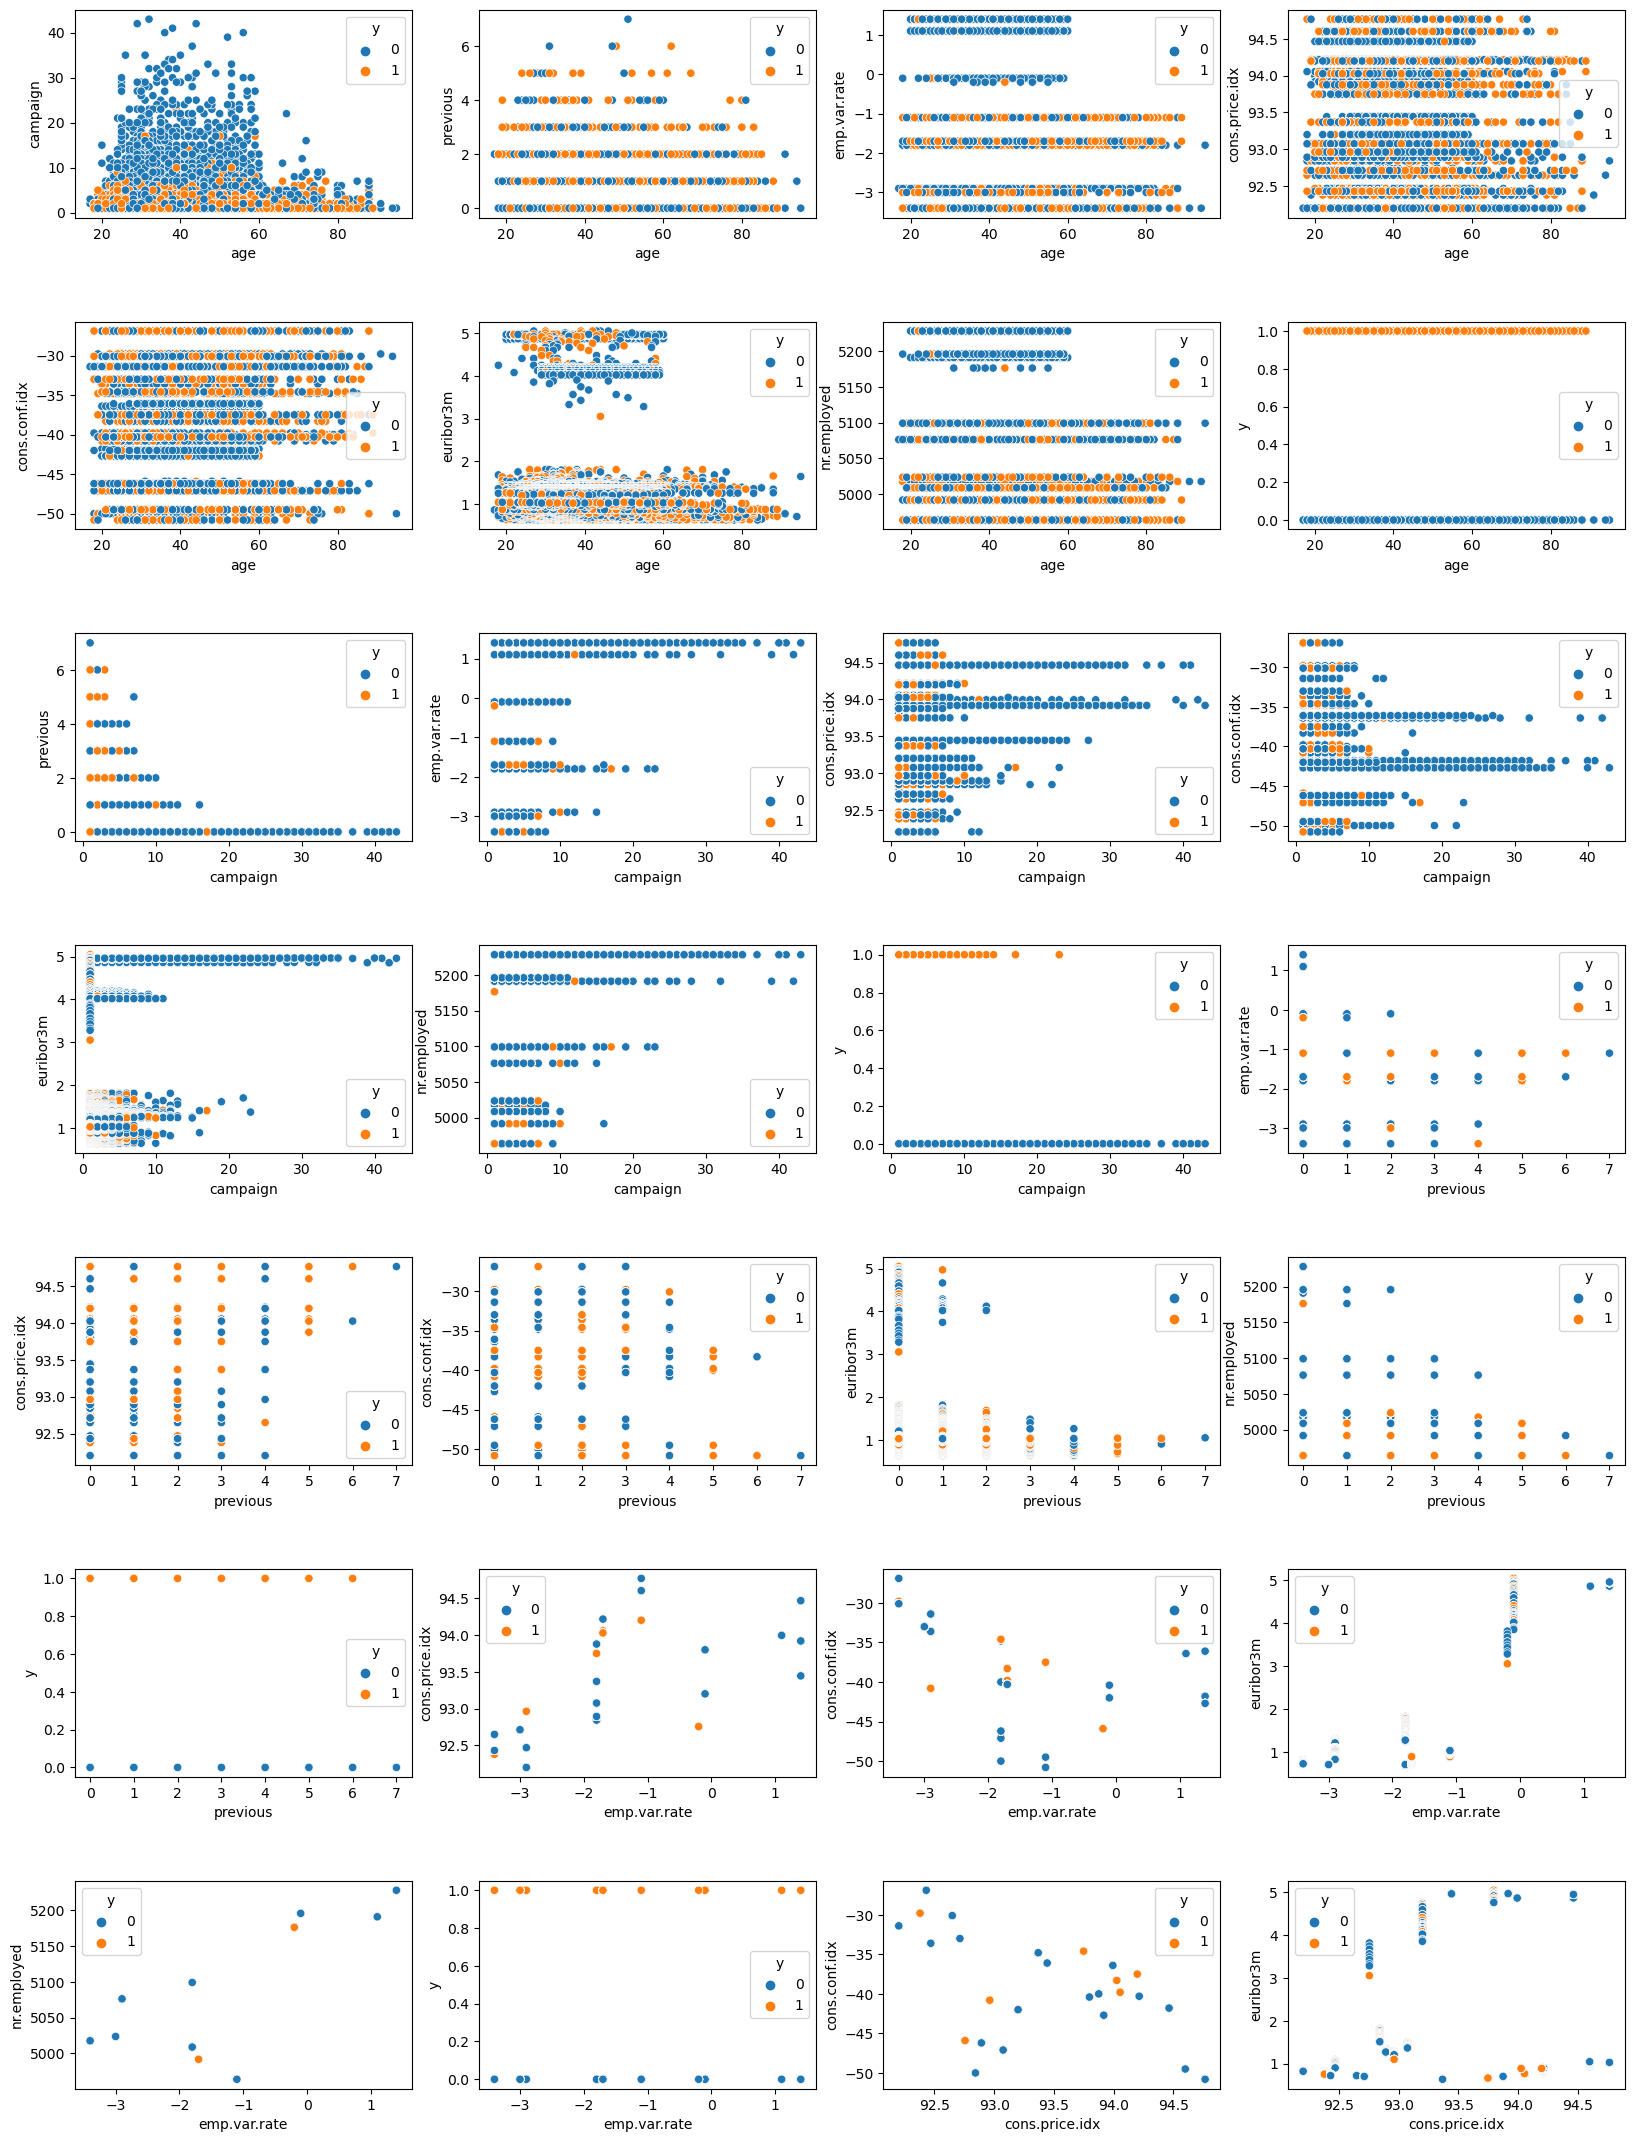

In [22]:
fig, ax = plt.subplots(7,4, figsize=(20,27))
ax = ax.ravel()
position = 0

a = 0
b = 1


while a < len(numbers):
    try:
        sns.scatterplot(x=numbers[a], y=numbers[b], data=df, hue='y', ax=ax[position])
        position += 1
        if b < len(numbers) - 1:
            b += 1
        else:
            a += 1
            b = a + 1
    except:
        break

plt.subplots_adjust(hspace=0.5)
plt.show()

- Cannot find any trend in the age group.
  
- campaign's 'yes' are located in lower values, that means that calling the customer more won't lead to a yes (during the same campaign)
  
- For the feature 'previous', the customer tend to say 'yes' if he was more than 4 time previously contacted. This puts in evidence the importance of customer relationship building
-  When 'emp.var.rate' is negative, customers tend to say yes
-  When 'nr.employed' is less than 5100, customers tend to say yes.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

# Objective: The business objective is to develop a more targeted marketing campaigns by identifying factors and profile of the customer who are more likely to get a term deposit from the bank. 


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30478 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30478 non-null  int64  
 1   job             30478 non-null  object 
 2   marital         30478 non-null  object 
 3   education       30478 non-null  object 
 4   default         30478 non-null  object 
 5   housing         30478 non-null  object 
 6   loan            30478 non-null  object 
 7   contact         30478 non-null  object 
 8   month           30478 non-null  int64  
 9   day_of_week     30478 non-null  int64  
 10  campaign        30478 non-null  int64  
 11  bcontacted      30478 non-null  object 
 12  previous        30478 non-null  int64  
 13  poutcome        30478 non-null  object 
 14  emp.var.rate    30478 non-null  float64
 15  cons.price.idx  30478 non-null  float64
 16  cons.conf.idx   30478 non-null  float64
 17  euribor3m       30478 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [24]:
# Convert categorical vairables into dummy vairables to fit into the model.
bank_features = df.iloc[:,:-1]
bank_features = pd.get_dummies(bank_features)
display(bank_features.head(5))

,age,month,day_of_week,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,bcontacted_no,bcontacted_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,5,1,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,1,1,0,0,1,0
2,37,5,1,1,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,1,1,0,0,1,0
3,40,5,1,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,1,1,0,0,1,0
4,56,5,1,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,1,1,0,0,1,0
6,59,5,1,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,1,1,0,0,1,0


# Model Based Feature Selection process

In [26]:
X = bank_features.values
y = df['y'].values.reshape(-1,1)

In [27]:
# Split the data for training and testing to detect the key features.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
# determining optimal number of features
n_features = [5, 10, 15, 20, 25, 30, 35, 40, 45]

start = timeit.default_timer()

for i in n_features:
    # Building the model based feature selection
    select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=i)

    select.fit(X_train, y_train.ravel())

    mask = select.get_support()

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    train = RandomForestClassifier().fit(X_train_rfe, y_train.ravel()).score(X_test_rfe, y_test.ravel())
    score = RandomForestClassifier().fit(X_train_rfe, y_train.ravel()).score(X_train_rfe, y_train.ravel())
    
    print("Train score: {:.3f}".format(train), "Test score: {:.3f}".format(score), " number of features: {}".format(i))

stop = timeit.default_timer()
print('Time: ', stop - start)  

Train score: 0.872 Test score: 0.951  number of features: 5
Train score: 0.870 Test score: 0.978  number of features: 10
Train score: 0.877 Test score: 0.989  number of features: 15
Train score: 0.879 Test score: 0.992  number of features: 20
Train score: 0.881 Test score: 0.994  number of features: 25
Train score: 0.885 Test score: 0.994  number of features: 30
Train score: 0.881 Test score: 0.995  number of features: 35
Train score: 0.882 Test score: 0.995  number of features: 40
Train score: 0.881 Test score: 0.995  number of features: 45
Time:  447.1575275330106


In [29]:
# See what features the model selects
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=20)

select.fit(X_train, y_train.ravel())

mask = select.get_support()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = RandomForestClassifier().fit(X_train_rfe, y_train.ravel()).score(X_test_rfe, y_test)

print("Test score: {:.3f}".format(score), " number of features: {}".format(20))

features = pd.DataFrame({'features':list(bank_features.keys()), 'select':list(mask)})
features = list(features[features['select']==True]['features'])
features

Test score: 0.880  number of features: 20


['age',
 'month',
 'day_of_week',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_admin.',
 'job_technician',
 'marital_married',
 'education_high.school',
 'education_university.degree',
 'housing_no',
 'housing_yes',
 'loan_no',
 'bcontacted_no',
 'bcontacted_yes']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [30]:
# Use the features that was identified in the previous steps to split for training testing.

X = bank_features[features].values
y = df['y'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train = y_train.ravel()


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [32]:
# Baseline Model: Predict the Most Frequent Class
most_frequent_class = np.bincount(y_train).argmax()
y_pred_baseline = np.full_like(y_test, fill_value=most_frequent_class)


In [33]:
# Evaluate Baseline Model Performance
accuracy = accuracy_score(y_test, y_pred_baseline)
precision = precision_score(y_test, y_pred_baseline, zero_division=0)
recall = recall_score(y_test, y_pred_baseline, zero_division=0)
f1 = f1_score(y_test, y_pred_baseline, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred_baseline)

# Print Baseline Model Performance
print("Baseline Model Performance:")
print(f"Most Frequent Class: {most_frequent_class}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Your classifier should aim to beat these metrics!

Baseline Model Performance:
Most Frequent Class: 0
Accuracy: 0.87
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[6636    0]
 [ 984    0]]


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [35]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, X_test, Y_test, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,4)), columns = ['classifier', 'train_score', 'test_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = start = timeit.default_timer()
        classifier.fit(X_train, Y_train)
        # Predict 
        predict = classifier.predict(X_test)
        Accuracy = accuracy_score(Y_test, predict)
        t_end = timeit.default_timer()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = t_diff
        df_results.loc[count,'Accuracy'] = Accuracy
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
        
    return df_results

In [36]:
df_results = batch_classify(X_train, y_train, X_test, y_test)
print(df_results.sort_values(by='train_score', ascending=False))

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/pytho

trained Logistic Regression in 0.33 s
trained Nearest Neighbors in 0.40 s
trained Linear SVM in 7.85 s
trained Gradient Boosting Classifier in 2.51 s
trained Decision Tree in 0.13 s
trained Random Forest in 0.44 s
trained Neural Net in 2.76 s
trained Naive Bayes in 0.07 s
                     classifier  train_score  test_score  training_time  \
4                 Decision Tree     0.991775    0.825328       0.133444   
5                 Random Forest     0.985213    0.876509       0.438164   
1             Nearest Neighbors     0.903097    0.874147       0.396107   
3  Gradient Boosting Classifier     0.892992    0.886745       2.509485   
0           Logistic Regression     0.883148    0.882021       0.329577   
2                    Linear SVM     0.874267    0.870866       7.848602   
7                   Naive Bayes     0.859568    0.865092       0.065416   
6                    Neural Net     0.664931    0.672178       2.764559   

   Accuracy  
4  0.825328  
5  0.876509  
1  0.8741

### Problem 9: Score the Model

What is the accuracy of your model?

## Accuracy: 0.87

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [38]:
df_results.sort_values(by='train_score', ascending=False)

,classifier,train_score,test_score,training_time,Accuracy
0,Logistic Regression,0.883148,0.882021,0.329577,0.882021
1,Nearest Neighbors,0.903097,0.874147,0.396107,0.874147
2,Linear SVM,0.874267,0.870866,7.848602,0.870866
3,Gradient Boosting Classifier,0.892992,0.886745,2.509485,0.886745
4,Decision Tree,0.991775,0.825328,0.133444,0.825328
5,Random Forest,0.985213,0.876509,0.438164,0.876509
6,Neural Net,0.664931,0.672178,2.764559,0.672178
7,Naive Bayes,0.859568,0.865092,0.065416,0.865092


In [40]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [41]:
# All our models perform well but I will go with GradientBoosting.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
4,Grad B CLF,0.887260
0,Logistic Reg.,0.882711
5,Rand FC,0.874267
1,SVC,0.874267
2,KNN,0.869892
3,Dec Tree,0.821726
6,Neural Classifier,0.818580
7,Naives Bayes,0.818580


## Gradiant Booster classifier did well.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions